# MACHINE LEARNING EVALUATING ALGORITHMS

## 1.Test Harness:

A test harness provides a consistent way to evaluate machine learning algorithms on a dataset.

It involves 3 elements:

1.The resampling method to split-up the dataset.

2.The machine learning algorithm to evaluate.

3.The performance measure by which to evaluate predictions.

The loading and preparation of a dataset is a prerequisite step that must have been completed prior to using the test harness.

The test harness must allow for different machine learning algorithms to be evaluated, whilst the dataset, resampling method and performance measures are kept constant.


In this tutorial, we are going to demonstrate the test harnesses with a real dataset.

The Zero Rule algorithm will be evaluated as part of the tutorial. The Zero Rule algorithm always predicts the class that has the most observations in the training dataset.

There are two main sections:

1.Train-Test Algorithm Test Harness.

2.Cross-Validation Algorithm Test Harness.

These test harnesses will give you the foundation that you need to evaluate a suite of machine learning algorithms on a given predictive modeling problem.

## 1. Train-Test Algorithm Test Harness


The train-test split is a simple resampling method that can be used to evaluate a machine learning algorithm.

As such, it is a good starting point for developing a test harness.

We can assume the prior development of a function to split a dataset into train and test sets and a function to evaluate the accuracy of a set of predictions.

We need a function that can take a dataset and an algorithm and return a performance score.

Below is a function named evaluate_algorithm() that achieves this. It takes 3 fixed arguments including the dataset, the algorithm function and the split percentage for the train-test split.

First, the dataset is split into train and test elements. Next, a copy of the test set is made and each output value is cleared by setting it to the None value, to prevent the algorithm from cheating accidentally.

The algorithm provided as a parameter is a function that expects the train and test datasets on which to prepare and then make predictions. The algorithm may require additional configuration parameters. This is handled by using the variable arguments *args in the evaluate_algorithm() function and passing them on to the algorithm function.

The algorithm function is expected to return a list of predictions, one for each row in the training dataset. These are compared to the actual output values from the unmodified test dataset by the accuracy_metric() function.

In [2]:

# Evaluate an algorithm using a train/test split
def evaluate_algorithm(dataset, algorithm, split, *args):
	train, test = train_test_split(dataset, split)
	test_set = list()
	for row in test:
		row_copy = list(row)
		row_copy[-1] = None
		test_set.append(row_copy)
	predicted = algorithm(train, test_set, *args)
	actual = [row[-1] for row in test]
	accuracy = accuracy_metric(actual, predicted)
	return accuracy


The evaluation function does make some strong assumptions, but they can easily be changed if needed.

Specifically, it assumes that the last row in the dataset is always the output value. A different column could be used. The use of the accuracy_metric() assumes that the problem is a classification problem, but this could be changed to mean squared error for regression problems.


## 2. Cross-Validation Algorithm Test Harness


Cross-validation is a resampling technique that provides more reliable estimates of algorithm performance on unseen data.

It requires the creation and evaluation of k models on different subsets of your data, and such is more computationally expensive. Nevertheless, it is the gold standard for evaluating machine learning algorithms.

As in the previous section, we need to create a function that ties together the resampling method, the evaluation of the algorithm on the dataset and the performance calculation method.

Unlike above, the algorithm must be evaluated on different subsets of the dataset many times. This means we need additional loops within our evaluate_algorithm() function.

Below is a function that implements algorithm evaluation with cross-validation.

First, the dataset is split into n_folds groups called folds.

Next, we loop giving each fold an opportunity to be held out of training and used to evaluate the algorithm. A copy of the list of folds is created and the held out fold is removed from this list. Then the list of folds is flattened into one long list of rows to match the algorithms expectation of a training dataset. This is done using the sum() function.

Once the training dataset is prepared the rest of the function within this loop is as above. A copy of the test dataset (the fold) is made and the output values are cleared to avoid accidental cheating by algorithms. The algorithm is prepared on the train dataset and makes predictions on the test dataset. The predictions are evaluated and stored in a list.

Unlike the train-test algorithm test harness, a list of scores is returned, one for each cross-validation fold.

In [3]:

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

Although slightly more complex in code and slower to run, this function provides a more robust estimate of algorithm performance.

## 2. Explore and Select Algorithms:

A better algorithm will always put forward an easy way to solve a problem.Classification, regression analysis, and clustering are some of the methods which help to create meaningful results. It is not that challenging to find a good performance measure.

**1-Categorize the problem**

The next step is to categorize the problem.

Categorize by the input: If it is a labeled data, it’s a supervised learning problem. If it’s unlabeled data with the purpose of finding structure, it’s an unsupervised learning problem. If the solution implies to optimize an objective function by interacting with an environment, it’s a reinforcement learning problem.

Categorize by output: If the output of the model is a number, it’s a regression problem. If the output of the model is a class, it’s a classification problem. If the output of the model is a set of input groups, it’s a clustering problem.

**2-Understand Your Data**

Data itself is not the end game, but rather the raw material in the whole analysis process. Successful companies not only capture and have access to data, but they’re also able to derive insights that drive better decisions, which result in better customer service, competitive differentiation, and higher revenue growth. The process of understanding the data plays a key role in the process of choosing the right algorithm for the right problem. Some algorithms can work with smaller sample sets while others require tons and tons of samples. Certain algorithms work with categorical data while others like to work with numerical input.

*Analyze the Data:*  
In this step, there are two important tasks which are understand data with descriptive statistics and understand data with visualization and plots.

*Process the data:*  
The components of data processing include pre-processing, profiling, cleansing, it often also involves pulling together data from different internal systems and external sources.

*Transform the data:*  
The traditional idea of transforming data from a raw state to a state suitable for modeling is where feature engineering fits in. Transform data and feature engineering may, in fact, be synonyms. And here is a definition of the latter concept. Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. By Jason Brownlee.

**3-Find the available algorithms**

After categorizing the problem and understand the data, the next milestone is identifying the algorithms that are applicable and practical to implement in a reasonable time. Some of the elements affecting the choice of a model are:

The accuracy of the model.

The interpretability of the model.

The complexity of the model.

The scalability of the model.

How long does it take to build, train, and test the model?

How long does it take to make predictions using the model?

Does the model meet the business goal?

**4-Implement machine learning algorithms.**
Set up a machine learning pipeline that compares the performance of each algorithm on the dataset using a set of carefully selected evaluation criteria. Another approach is to use the same algorithm on different subgroups of datasets. The best solution for this is to do it once or have a service running that does this in intervals when new data is added.


**5-Optimize hyperparameters:** There are three options for optimizing hyperparameters, grid search, random search, and Bayesian optimization.

To get the better performance of machine learning software we need to use the best algorithm. To get the best algorithms that suits our data and requirements we have to compare the algorithms and select which gives the best outcome.

You should use a number of different ways of looking at the estimated accuracy of your machine learning algorithms in order to choose the one or two to finalize.

A way to do this is to use different visualization methods to show the average accuracy, variance and other properties of the distribution of model accuracies.

The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data.

You can achieve this by forcing each algorithm to be evaluated on a consistent test harness.

In the example below 6 different algorithms are compared:

1.Logistic Regression

2.Linear Discriminant Analysis

3.K-Nearest Neighbors

4.Classification and Regression Trees

5.Naive Bayes

6.Support Vector Machines

The problem is a standard binary classification dataset called the Pima Indians onset of diabetes problem. The problem has two classes and eight numeric input variables of varying scales.

Datasets are in diabetes.csv and diabetes.names.txt

The 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way.

In [2]:
import warnings
warnings.filterwarnings('ignore')

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.693934 (0.050212)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


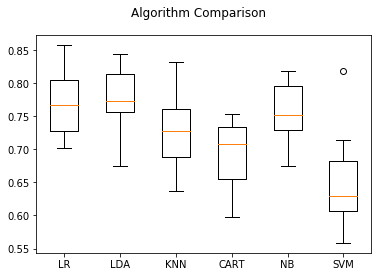

In [3]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In this way, we can evaluate algorithms and find the best algorithm that suits our data and requirements.

## 3.Interpret and report results:

How to interpret an ML model?

Machine Learning models vary in degrees of complexity and performance. One size doesn’t fit them all. As a result, there are different ways to interpret them. Primarily, these methods can be categorized as: 

Model-specific / Model-agnostic

Model-specific methods are specific to certain models, they depend on the inner machinery of a model to make certain conclusions. These methods may include the interpretation of coefficient weights in Generalized Linear Models (GLMs), or weights and biases in the case of Neural Networks.
Model-agnostic methods can be used on any model. They’re generally applied post-training. They usually work by analyzing the relationship between feature input-output pairs and don’t have access to the model’s internal mechanics such as weights or assumptions.

Local / Global scope

The local scope covers only an individual prediction, capturing the reasons behind only the specified prediction.
The global scope extends beyond an individual data point and covers the model’s general behavior.


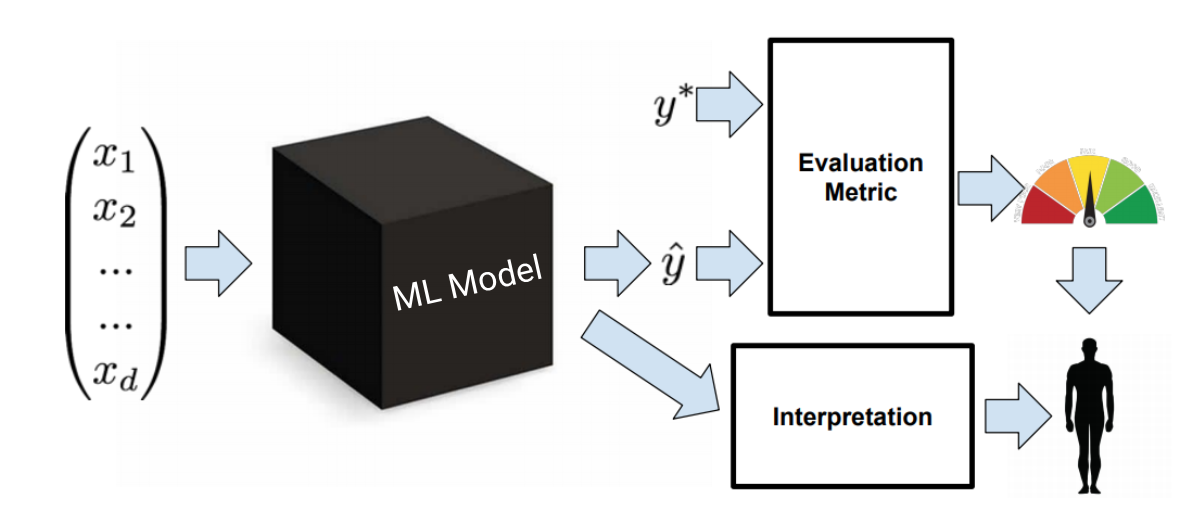

Let’s create a model to interpret.

### **Model Creation**

1. Loading the dataset

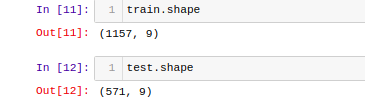

2. Performing Exploratory Data Analysis & data pre-processing

  1.Filling the null values.

  2.Dropping redundant features like Time (GMT).

  3.Cleaning the text data by removing everything alphanumeric characters.

  4.Label Encoding the categorically valued attributes

  5.Handling erroneous values present in certain attributes

  6.Lemmatization & Tf-Idf vectorization of text-based features.

3. Feature engineering

  -Combining all the text features into a single text feature to make up for the missing values.

  -Mapping data to weekdays.

  -Mapping Time to hours.

  -Creating another feature based on the length of the conversation text.

4. Final train & test datasets

It can be seen that tf-idf vectorization, as well as feature engineering, leads to an increase in number of attributes, in both train & test datasets.

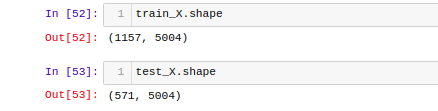

5. Training the Classifier

Although a range of models can be used for this task, we’re going with Random Forest Classifier, which isn’t easily interpretable because it’s complex. We want to use a number of tools and frameworks to make it interpretable.

6. Getting predictions on the test dataset

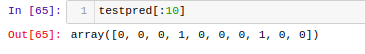

7. Model performance evaluation

As we don’t have the correct labels from the test dataset, let’s see how our model performed via the training classification report, and K-fold cross-validation scores.

Training Classification Report:

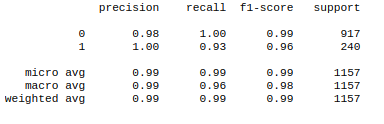

K-fold Cross-Validation scores:

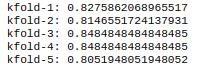

### **Model Interpretation tools**

### **1.ELI5**

ELI5 is an acronym for ‘Explain Like I’m 5’. It’s a Python library that’s popular because it’s easy to use. It’s mainly used:

To learn about important features that played a crucial role in predictions.
To analyze a certain individual prediction, and see what exactly led the model to that prediction. 
ELI5 interprets models more in a Local/Global scope way, rather than a Specific/Agnostic way, which we discussed above. 

Also, currently ELI5 can be used only for a few of the prominent models – Sklearn Generalized Linear Models (GLMs) and tree-based models, Keras models, LightGBM, XGBoost, CatBoost.

*How to install Eli5*

Eli5 can be installed with a pip command.

pip install eli5

Or, it can be installed with a conda command.

conda install -c conda-forge eli5

-Using Eli5 on a model

Import Eli5

### **2. LIME**

LIME stands for Local Interpretable Model-agnostic Explanations. Let’s dwell a little deeper into the name:

The term Local means an analysis of individual predictions. LIME gives us extensive insights into what goes on behind a certain prediction.
It’s model-agnostic, which means it treats every model as a black box, so it can make interpretations without accessing model internals, allowing it to work with a wide range of models.
As intuitive as the name is, the idea behind its interpretation logic is just as intuitive:

LIME basically tests what happens to the predictions once the model is provided with certain variations in the input data.
To test this, LIME trains an interpretable model on a new dataset consisting of perturbed samples and the corresponding predictions of the black box model.
This new learned model needs to be a good local approximation (for a certain individual prediction), but doesn’t have to be a good global approximation. It can be expressed mathematically as:

The explanation model, for example x, is the interpretable model g created by LIME which minimizes the loss function L, which measures how close the explanation is to the prediction of original model f, while the model complexity Ω(g) is kept low (fewer features). G is the family of possible explanations, i.e. all GLMs.

*How to install LIME?*

Like ELI5, it can also be installed with a simple pip command.

pip install lime

Or with a conda command.

conda install -c conda-forge lime

LIME offers three methods for interpretation mainly and all three deal with different kind of data:

-Tabular Interpretation

-Text interpretation

-Image interpretation.

### **3. SHAP**

SHapley Additive exPlanations is a game-theoretic approach to explain the output of any machine learning model. SHAP explains the prediction of an instance by computing the contribution of each feature to that prediction. It uses Shapley values.

-What are Shapley values?

Shapley values – a method from coalitional game theory – tell us how to distribute the “payout” among the features.
Thus a prediction can be explained by assuming that each feature value of the instance is a “player” in the game where prediction is the payout.

-How are Shapely values calculated?

The Shapely value is the average marginal contribution of a feature value across all possible coalitions.
Let’s say we have a dataset of shape N x M, where N is the number of samples and M is the number of features, for example 5 – A, B, C, D & E.
E is the dependent attribute having continuous values, while A, B, C, D are our categorically valued predictors.
Now, say we want to calculate the contribution of feature A, i.e. calculate its Shapely value.
We simulate only A, B and C are in a coalition by randomly picking an instance from the dataset and using it’s value of feature D. We then predict E for this combination, say it comes out to be X.
Now we replace the value of feature A in this combination with a randomly drawn value from A’s domain (provided it’s different) and predict E again, say it comes out as Y this time.
The difference between X-Y, whether positive or negative, is the contribution of feature A in prediction.
This sampling step for A’s value is repeated again and again, and contributions are averaged to obtain the Shapely value for A.
The SHAP explanation can be expressed mathematically as:


where g is the explanation model, z′ϵ{0,1}M, is the coalition vector, M is the maximum coalition size and 𝜙j ϵ R is the Shapely value for a feature j.


-How to install SHAP

Just like other libraries, it can be installed with a pip command, just make sure that the pip version is over 19.0.

pip install shape

If you run into any error with pip, you can always use conda for installation.

conda install -c conda-forge shap

Using SHAP on a model

Import shap

### **4. MLXTEND**
MLxtend or Machine Learning Extensions is a library of useful tools for day-to-day data science & machine learning tasks. It offers a wide range of functions to work with.

How to install MLXTEND
It can be installed with a simple pip command.

pip install mlxtend

Using MLXTEND on our model

Import mlxtend

MLXTEND offers different features, like:

1. PCA correlation circle

An interesting way of looking at results can be via Principal Component Analysis.

-MLXTEND lets you plot a PCA correlation circle using the plot_pca_correlation_graph function.

-We basically compute the correlation between our features and the Principal Components.

-Then these correlations are plotted as vectors on a unit circle, whose axes are the Principal Components.

-Specific Principal Components can be passed as a tuple to dimensions function argument.

-The correlation circle axes show the percentage of variance explained for the corresponding Principal Components.

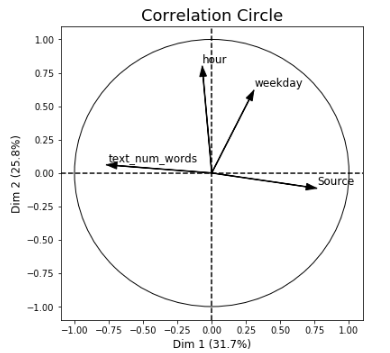

2. Bias-Variance decomposition

Everyone knows the bias-variance tradeoff, which plagues all machine learning projects.

Often the goal is to find a sweet spot between the two, to avoid underfitting by keeping a low bias, and avoid overfitting by keeping a low variance.

It’s hard to get a bias-variance score for any predictive model, but MLXTEND can decompose the generalization error of a model into bias, variance, and error score.

3. Plotting decision boundaries & regions of the model

With MLXTEND, we can also take a look at the model’s decision boundary in 2 dimensions and see how the model is differentiating among data points of different classes.

However, there’s a drawback associated with this interpretation technique. Only 2 features can be used at a time for this visualization, therefore we will only be using our non-text features here, in groups of two.

## **Conclusion**

Evaluating our Algorithm is an essential part of any project.Once we defined our problem and prepared data we need to apply machine learning algorithm to the data in order to solve our problem.